In [4]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [5]:
import numpy as np
import pandas as pd
import datetime as dt


# Reflect Tables into SQLAlchemy ORM

In [6]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

from sqlalchemy.ext.declarative import declarative_base
from sqlalchemy import Column, Integer, String, Float

In [7]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
conn = engine.connect()

In [8]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [9]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [10]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station
Base = declarative_base()

In [11]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [12]:
#Display first row of data with column names
first_row_measurement = session.query(Measurement).first()
first_row_measurement.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x1e281d115a0>,
 'id': 1,
 'date': '2010-01-01',
 'tobs': 65.0,
 'prcp': 0.08,
 'station': 'USC00519397'}

In [39]:
first_row_station = session.query(Station).first()
first_row_station.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x1e281c8bfa0>,
 'latitude': 21.2716,
 'id': 1,
 'elevation': 3.0,
 'name': 'WAIKIKI 717.2, HI US',
 'longitude': -157.8168,
 'station': 'USC00519397'}

In [40]:
# for row in session.query(Measurement.id, Measurement.prcp, Measurement.date,  Measurement.tobs,
# Measurement.station).limit(50).all():
#     print(row)

unique_stations = session.query(Measurement).group_by(Measurement.station).count()
print(unique_stations)

9


# Exploratory Precipitation Analysis

In [22]:
# Find the most recent date in the data set.
most_recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
most_recent_date

# Find the most recent date in the data set.- Alternative
# most_recent_date = session.query(func.max(Measurement.date)).first()
# most_recent_date

('2017-08-23',)

In [23]:
  #c# Combine both tables measurement and station into one
station_measurements = pd.merge(station_df, measurement_df, on="station", how="inner")
station_measurements.head()   #count()    #describe()          #info()     #columns    #head()


,id_x,station,name,latitude,longitude,elevation,id_y,date,prcp,tobs
0,1,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0,1,2010-01-01,0.08,65.0
1,1,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0,2,2010-01-02,0.00,63.0
2,1,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0,3,2010-01-03,0.00,74.0
3,1,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0,4,2010-01-04,0.00,76.0
4,1,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0,6,2010-01-07,0.06,70.0


In [24]:
station_measurements.columns

Index(['id_x', 'station', 'name', 'latitude', 'longitude', 'elevation', 'id_y',
       'date', 'prcp', 'tobs'],
      dtype='object')

In [25]:
# !!! PLEASE SEE RESULTS OF TASKS #s 6,9,12,15 & 18 IN NEXT SECTIONS!!!

# Design a query to retrieve the last 12 months of precipitation data and plot the results.
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.


# Perform a query to retrieve the data and precipitation scores


# Save the query results as a Pandas DataFrame. Explicitly set the column names


# Sort the dataframe by date


# Use Pandas Plotting with Matplotlib to plot the data


In [26]:
# Calculate the date one year from the last date in data set. - LINE 6 TASK
One_Year_Earlier = dt.date(2017, 8, 23) - dt.timedelta(days=365)
One_Year_Earlier

datetime.date(2016, 8, 23)

In [27]:
# Perform a query to retrieve the data and precipitation scores - LINE 9 TASK
data_precip_scores = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= One_Year_Earlier).all()
data_precip_scores

[('2016-08-23', 0.0),
 ('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06'

In [28]:
# Save the query results as a Pandas DataFrame. Explicitly set the column names - LINE 12 TASK
pdf = pd.DataFrame(data_precip_scores, columns=['date', 'precipitation'])
pdf

,date,precipitation
0,2016-08-23,0.00
1,2016-08-24,0.08
2,2016-08-25,0.08
3,2016-08-26,0.00
4,2016-08-27,0.00
...,...,...
2225,2017-08-19,0.09
2226,2017-08-20,NaN
2227,2017-08-21,0.56
2228,2017-08-22,0.50


In [29]:
# Sort the dataframe by date - LINE 15 TASK
pdf = pdf.sort_values("date")
pdf.head() # Sort by earliest date
#pdf.tail() # Sort by most recent date

,date,precipitation
0,2016-08-23,0.00
1009,2016-08-23,NaN
1529,2016-08-23,1.79
704,2016-08-23,0.05
361,2016-08-23,0.15


Text(0.5, 1.0, 'Rainfall in 9 Hawaiian Cities')

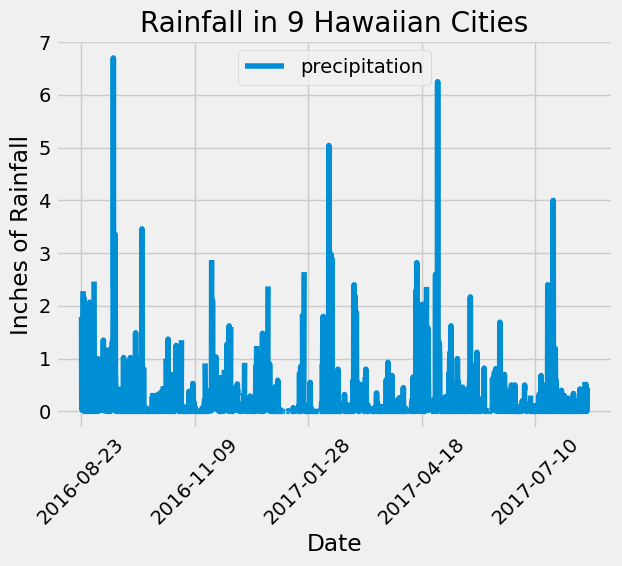

In [30]:
# Use Pandas Plotting with Matplotlib to plot the data - LINE 18 TASK 
pdf.plot(x='date', y='precipitation', rot=45)
plt.xlabel("Date")
plt.ylabel("Inches of Rainfall")
plt.title("Rainfall in 9 Hawaiian Cities")

In [31]:
# Use Pandas to calculate the summary statistics for the precipitation data
pdf.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [32]:
# Design a query to calculate the total number of stations in the dataset
unique_stations = session.query(Measurement).group_by(Measurement.station).count()
print(unique_stations)

9


In [38]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
session.query( Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()



[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [34]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
    filter(Measurement.station == 'USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

Text(0.5, 1.0, 'Frequency of temperatures/last 12 months/Waihee Station')

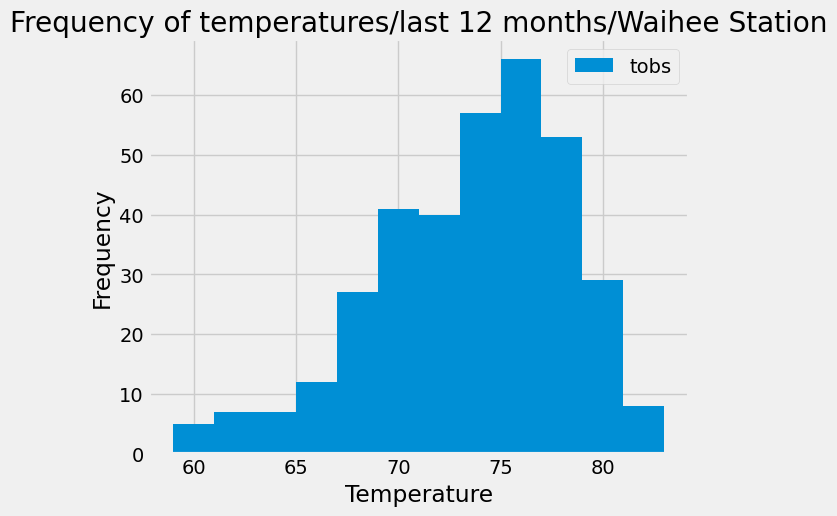

In [36]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
One_Year_Earlier = dt.date(2017, 8, 23) - dt.timedelta(days=365)

data_precip_scores = session.query(Measurement.tobs).\
    filter(Measurement.station == 'USC00519281').\
    filter(Measurement.date >= One_Year_Earlier).all()
df = pd.DataFrame(data_precip_scores, columns=['tobs'])
df.plot.hist(bins=12)
plt.tight_layout()
plt.xlabel("Temperature")
plt.title("Frequency of temperatures/last 12 months/Waihee Station")

# Close Session

In [41]:
# Close Session
session.close()